# Telecom Churn Case Study Hackathon

### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, our goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

# We are going to follow the bellow steps for this analysis 
1. Data preparation
2. Data understanding (EDA)
3. Modeling
    *  PCA with XG Boosting to predict churn - goal 1
    *   RFE with Logistics regression to predict feature - goal 2
4. Testing of model 

# Importing the necessary libraries and datasets:





In [105]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno



#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# Set the display options to show complete column values
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Importing the datasets


In [207]:
#importing test, train and data dictionary.

churn = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(churn.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


# Analysing the Dataset 

In [107]:
# look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [108]:
#defining a function to print null count, percentage about the dataset
def metadata_matrix(data) :
    return pd.DataFrame({
                'Datatype' : churn.dtypes.astype(str),
                'Non_Null_Count': churn.count(axis = 0).astype(int),
                'Null_Count': churn.isnull().sum().astype(int),
                'Null_Percentage': round(churn.isnull().sum()/len(churn) * 100 , 2),
                'Unique_Values_Count': churn.nunique().astype(int)
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(churn)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


# Data Clean up

In [109]:
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [110]:
# # Specify the substring to search for
# substring = 'num'

# # Print column names containing the substring
# matching_columns = [column for column in churn.columns if substring in column]
# print(matching_columns)


# defining function to return the list of columns with matching string
def printMatchingColumns(pattern):
  # Print column names containing the substring
  matching_columns = [column for column in churn.columns if pattern in column]
  print(matching_columns)


In [208]:
churn['id'].value_counts().sum()

69999

<li> id column is the unique column to identify each record

In [209]:
#identifying the matching columns with vbc
printMatchingColumns("vbc")

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']


In [113]:
# Renaming vbc columns based on month to 6,7,8 instead of jun,jul,aug
churn = churn.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8'}, axis=1)

In [210]:
#identifying the categorical and numerical columns based on unique value counts
columns=churn.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=churn[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and churn[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_ic_t2o_mou_6
7   std_ic_t2o_mou_7
8   std_ic_t2o_mou_8
9    count_rech_3g_6
10   count_rech_3g_7
11   count_rech_3g_8
12  night_pck_user_6
13  night_pck_user_7
14  night_pck_user_8
15         fb_user_6
16         fb_user_7
17         fb_user_8 



In [115]:
#converting the datatype of categorical column to category
churn[change_to_cat]=churn[change_to_cat].astype('category')

In [116]:
#converting sachet columns to type category
sachet_columns = churn.filter(regex='.*sachet.*', axis=1).columns.values
churn[sachet_columns] = churn[sachet_columns].astype('category')

In [117]:

columns=churn.columns
col_with_date=[]
#imorting regex module re
import re
#identfying the list of date columns using regex
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
churn[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

In [118]:
#converting date columns to date time format
for col in col_with_date:
    churn[col]=pd.to_datetime(churn[col], format="%m/%d/%Y")
churn[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-22,2014-07-10,2014-08-24,NaT,NaT,NaT
1,2014-06-12,2014-07-10,2014-08-26,NaT,2014-07-08,NaT
2,2014-06-11,2014-07-22,2014-08-24,NaT,NaT,NaT
3,2014-06-15,2014-07-21,2014-08-25,NaT,NaT,NaT
4,2014-06-25,2014-07-26,2014-08-30,2014-06-25,2014-07-23,2014-08-20


# Identifying high value customers

In [119]:
#finding list of columns with rech amount
printMatchingColumns("rech_amt")

['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


In [120]:
#creating a new column average recharge amoung of 6 and 7 th month
churn['Average_rech_amt_6n7']=(churn['total_rech_amt_6']+churn['total_rech_amt_7'])/2

In [121]:
#filtering the churn dataset based on average recharge amount above 0.7 quantile 
churn=churn[(churn['Average_rech_amt_6n7']>= churn['Average_rech_amt_6n7'].quantile(0.7))]

# Handling missing values

In [122]:
# printing the null percentage of churn dataset
missing_values = metadata_matrix(churn)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
count_rech_3g_6,category,62.43
max_rech_data_6,float64,62.43
count_rech_2g_6,float64,62.43
arpu_3g_6,float64,62.43
date_of_last_rech_data_6,datetime64[ns],62.43
night_pck_user_6,category,62.43
total_rech_data_6,float64,62.43
arpu_2g_6,float64,62.43
fb_user_6,category,62.43
av_rech_amt_data_6,float64,62.43


In [123]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(churn)
condition = metadata['Null_Percentage'] > 50
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
count_rech_3g_6,category,7896,13122,62.43,23
av_rech_amt_data_6,float64,7896,13122,62.43,703
max_rech_data_6,float64,7896,13122,62.43,43
count_rech_2g_6,float64,7896,13122,62.43,28
arpu_3g_6,float64,7896,13122,62.43,3499
date_of_last_rech_data_6,datetime64[ns],7896,13122,62.43,30
night_pck_user_6,category,7896,13122,62.43,2
total_rech_data_6,float64,7896,13122,62.43,34
arpu_2g_6,float64,7896,13122,62.43,3298
fb_user_6,category,7896,13122,62.43,2


In [124]:
# Dropping above columns with high missing values
high_missing_value_columns = high_missing_values.index
churn.drop(columns=high_missing_value_columns, inplace=True)

In [125]:
metadata_matrix(churn)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_8,float64,20363,655,3.12,14491
og_others_8,float64,20363,655,3.12,106
loc_og_t2f_mou_8,float64,20363,655,3.12,2654
loc_ic_t2t_mou_8,float64,20363,655,3.12,8085
spl_og_mou_8,float64,20363,655,3.12,2795
loc_og_t2m_mou_8,float64,20363,655,3.12,12795
loc_ic_t2m_mou_8,float64,20363,655,3.12,12491
loc_ic_t2f_mou_8,float64,20363,655,3.12,3958
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
std_og_t2f_mou_8,float64,20363,655,3.12,1303


#### The null values is observed in month columns 6,7,8.


## Month wise data handling

#### Month 6

In [126]:
sixth_month_columns = []
#listing the list of 6th month columns
for column in churn.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)

In [127]:
sixth_month_columns

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2c_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_t2o_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'vbc_3g_6']

In [128]:
# Sixth Month meta data
metadata = metadata_matrix(churn)
print(type(metadata))
condition = metadata.index.isin(sixth_month_columns)
print(type(condition))
sixth_month_metadata = metadata[condition]
sixth_month_metadata

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_6,float64,20795,223,1.06,859
spl_og_mou_6,float64,20795,223,1.06,2643
std_og_mou_6,float64,20795,223,1.06,13776
loc_ic_t2f_mou_6,float64,20795,223,1.06,4018
loc_ic_t2t_mou_6,float64,20795,223,1.06,8285
loc_ic_t2m_mou_6,float64,20795,223,1.06,12885
loc_ic_mou_6,float64,20795,223,1.06,14882
std_ic_t2t_mou_6,float64,20795,223,1.06,3805
std_ic_t2m_mou_6,float64,20795,223,1.06,5571
std_ic_t2f_mou_6,float64,20795,223,1.06,1652


In [129]:
# identifying the list of columns having same null value cont
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.06
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['isd_og_mou_6', 'spl_og_mou_6', 'std_og_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6',
       'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'std_og_t2c_mou_6', 'og_others_6', 'roam_ic_mou_6',
       'std_og_t2t_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2f_mou_6',
       'roam_og_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'onnet_mou_6',
       'offnet_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'loc_og_t2m_mou_6'], dtype=object)

In [130]:
# Looking at all sixth month columns where rows of *_mou are null
condition = churn[sixth_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*churn.shape[0], index = churn.index)


for column in sixth_month_meaningful_missing_cols :
    missing_rows = missing_rows & churn[column].isnull()

missing_rows

print('Total outgoing mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [131]:
# Impuuting null values with 0
churn[sixth_month_meaningful_missing_cols] = churn[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(churn)

metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],20976,42,0.2,30
total_rech_num_6,int64,21018,0,0.0,94
total_rech_amt_6,int64,21018,0,0.0,2027
max_rech_amt_6,int64,21018,0,0.0,160
vbc_3g_6,float64,21018,0,0.0,4851
monthly_2g_6,int64,21018,0,0.0,5
sachet_2g_6,category,21018,0,0.0,27
vol_3g_mb_6,float64,21018,0,0.0,4919
vol_2g_mb_6,float64,21018,0,0.0,5738
monthly_3g_6,int64,21018,0,0.0,10


In [132]:
#identifying the columns with date of last recharge in 6th month is null
condition = churn['date_of_last_rech_6'].isnull()
churn[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
1575,0,0,0,NaT
2583,0,0,0,NaT
3008,0,0,0,NaT
3332,0,0,0,NaT
6809,0,0,0,NaT


In [133]:
#idenfing the columns with single unique value
churn[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

In [134]:
metadata = metadata_matrix(churn)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],20976,42,0.2,30
total_rech_num_6,int64,21018,0,0.0,94
total_rech_amt_6,int64,21018,0,0.0,2027
max_rech_amt_6,int64,21018,0,0.0,160
vbc_3g_6,float64,21018,0,0.0,4851
monthly_2g_6,int64,21018,0,0.0,5
sachet_2g_6,category,21018,0,0.0,27
vol_3g_mb_6,float64,21018,0,0.0,4919
vol_2g_mb_6,float64,21018,0,0.0,5738
monthly_3g_6,int64,21018,0,0.0,10


### Month 7 Columns

In [135]:
seventh_month_columns = []
# finding the list 7th month column
for column in churn.columns:
    x = re.search("7$", column)
    if x:
        seventh_month_columns.append(column)

In [137]:
# seventh_month_metadata 
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]

In [138]:
#finding the list 7th month column haing same null count
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 0.99
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['isd_og_mou_7', 'ic_others_7', 'spl_og_mou_7', 'loc_ic_t2f_mou_7',
       'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7',
       'offnet_mou_7', 'loc_og_t2c_mou_7', 'onnet_mou_7', 'roam_ic_mou_7',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'roam_og_mou_7',
       'std_og_t2t_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7',
       'loc_og_mou_7', 'loc_og_t2f_mou_7'], dtype=object)

In [139]:
# Looking at all seventh month columns where rows of *_mou are null
condition = churn[seventh_month_meaningful_missing_cols].isnull()

missing_rows = pd.Series([True]*churn.shape[0], index = churn.index)


for column in seventh_month_meaningful_missing_cols :
    missing_rows = missing_rows & churn[column].isnull()

missing_rows

print('Total outgoing mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [140]:
# Imputing na columns with 0
churn[seventh_month_meaningful_missing_cols] = churn[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(churn)

metadata.iloc[metadata.index.isin(seventh_month_columns)] 

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],20936,82,0.39,31
last_date_of_month_7,object,20998,20,0.10,1
ic_others_7,float64,21018,0,0.00,1119
vbc_3g_7,float64,21018,0,0.00,5158
isd_ic_mou_7,float64,21018,0,0.00,2795
spl_ic_mou_7,float64,21018,0,0.00,84
total_rech_num_7,int64,21018,0,0.00,96
total_ic_mou_7,float64,21018,0,0.00,15869
std_ic_mou_7,float64,21018,0,0.00,7083
std_ic_t2o_mou_7,category,21018,0,0.00,1


In [141]:
condition = churn['date_of_last_rech_7'].isnull()
churn[condition].filter(regex='.*rech.*7$', axis=1).head()
churn[condition].head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,Average_rech_amt_6n7
380,380,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,-2041.228,3972.71,-945.808,1501.31,2005.94,1722.39,4104.01,4619.03,5738.13,0.0,0.0,0.0,0.0,0.00,0.0,418.76,450.01,543.49,2653.43,3297.39,4524.59,17.59,0.43,5.74,5.64,0.0,9.76,3089.79,3747.84,5073.84,1082.54,1555.93,1178.89,1413.83,1317.66,1187.96,13.49,1.55,9.71,0.0,0.0,0.0,2509.88,2875.14,2376.58,0.0,0.0,0.0,5.64,1.98,10.09,0.0,0.0,0.0,5605.33,6624.98,7460.53,5.46,6.93,11.51,39.93,44.39,48.28,0.00,0.00,0.00,45.39,51.33,59.79,5.56,2.16,3.24,14.41,10.24,5.39,0.00,0.0,0.0,0.0,0.0,0.0,19.98,12.41,8.64,65.38,63.78,68.61,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.03,0.16,3,0,3,5021,0,5021,3010,0,3010,2014-06-17,NaT,2014-08-28,3010,0,3010,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1038,0.0,0.0,0.00,0,2510.5
1211,1211,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,209.788,523.74,257.159,87.28,130.09,41.51,211.39,474.58,125.81,0.0,0.0,0.0,0.0,2.16,0.0,10.64,46.91,5.11,14.34,15.36,1.48,0.00,0.00,0.00,0.00,0.0,0.00,24.99,62.28,6.59,76.63,82.28,36.39,197.04,457.94,124.33,0.00,0.00,0.00,0.0,0.0,0.0,273.68,540.23,160.73,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,298.68,602.51,167.33,1.68,17.58,3.38,1.51,13.18,7.99,0.00,1.01,0.00,3.19,31.78,11.38,0.00,0.01,0.00,0.00,0.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.51,0.00,3.19,32.29,11.38,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,4,0,5,1096,0,67,1050,0,67,2014-06-21,NaT,2014-08-27,0,0,67,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,870,0.0,0.0,0.00,0,548.0
1728,1728,109,0.0,0.0,0.0,6/30/2014,NaN,NaN,679.329,0.00,0.000,189.51,0.00,NaN,920.18,0.00,NaN,0.0,0.0,NaN,0.0,0.00,NaN,18.44,0.00,NaN,131.23,0.00,NaN,0.00,0.00,NaN,1.13,0.0,NaN,149.68,0.00,NaN,171.06,0.00,NaN,781.49,0.00,NaN,4.26,0.00,NaN,0.0,0.0,NaN,956.83,0.00,NaN,0.0,0.0,NaN,3.18,0.00,NaN,0.0,0.0,NaN,1109.69,0.00,0.00,5.58,0.00,NaN,84.26,0.00,NaN,2.91,0.00,NaN,92.76,0.00,NaN,0.00,0.00,NaN,20.86,0.00,NaN,5.91,0.0,NaN,0.0,0.0,NaN,26.78,0.00,NaN

In [142]:
churn[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    68
dtype: int64

#### Month 8

In [143]:
eighth_month_columns = []
for column in churn.columns:
    x = re.search("8$", column)
    if x:
        eighth_month_columns.append(column)

In [144]:
eighth_month_columns

['last_date_of_month_8',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'vbc_3g_8']

In [145]:
eighth_month_metadata = metadata[metadata.index.isin(eighth_month_columns)]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2m_mou_8,float64,20363,655,3.12,10323
loc_og_t2t_mou_8,float64,20363,655,3.12,8824
loc_og_t2f_mou_8,float64,20363,655,3.12,2654
loc_og_t2c_mou_8,float64,20363,655,3.12,1472
loc_og_mou_8,float64,20363,655,3.12,14507
std_og_t2t_mou_8,float64,20363,655,3.12,8937
std_og_t2f_mou_8,float64,20363,655,3.12,1303
std_og_t2c_mou_8,category,20363,655,3.12,1
std_og_mou_8,float64,20363,655,3.12,12663
isd_og_mou_8,float64,20363,655,3.12,736


In [146]:
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.12
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'ic_others_8',
       'isd_ic_mou_8', 'loc_ic_t2t_mou_8', 'spl_ic_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2o_mou_8', 'loc_og_t2m_mou_8', 'std_ic_t2f_mou_8',
       'offnet_mou_8', 'roam_og_mou_8', 'onnet_mou_8', 'roam_ic_mou_8'],
      dtype=object)

In [147]:
condition = churn[eighth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns
missing_rows = pd.Series([True]*churn.shape[0], index = churn.index)
for column in eighth_month_meaningful_missing_cols :
    missing_rows = missing_rows & churn[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', churn.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [148]:
# Imputation
churn[eighth_month_meaningful_missing_cols] = churn[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(churn)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],20603,415,1.97,31
last_date_of_month_8,object,20910,108,0.51,1
isd_ic_mou_8,float64,21018,0,0.00,2720
total_ic_mou_8,float64,21018,0,0.00,15373
spl_ic_mou_8,float64,21018,0,0.00,81
ic_others_8,float64,21018,0,0.00,1041
std_ic_mou_8,float64,21018,0,0.00,6715
std_ic_t2m_mou_8,float64,21018,0,0.00,5347
loc_ic_mou_8,float64,21018,0,0.00,14491
std_ic_t2t_mou_8,float64,21018,0,0.00,3694


In [149]:
condition = churn['date_of_last_rech_8'].isnull()
churn[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
183,0,0,0,NaT
224,0,0,0,NaT
1015,0,0,0,NaT
1127,0,0,0,NaT
1395,0,0,0,NaT


In [150]:
churn[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

In [151]:
100*churn.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / churn.shape[0]

last_date_of_month_6    0.000000
last_date_of_month_7    0.095157
last_date_of_month_8    0.513845
dtype: float64

In [152]:
print(churn['last_date_of_month_6'].unique())
print(churn['last_date_of_month_7'].unique())
print(churn['last_date_of_month_8'].unique()) 

['6/30/2014']
['7/31/2014' nan]
['8/31/2014' nan]


In [153]:
churn['last_date_of_month_7'] = churn['last_date_of_month_7'].fillna(churn['last_date_of_month_7'].mode()[0])
churn['last_date_of_month_8'] = churn['last_date_of_month_8'].fillna(churn['last_date_of_month_8'].mode()[0])

In [154]:
print(churn['last_date_of_month_6'].unique())
print(churn['last_date_of_month_7'].unique())
print(churn['last_date_of_month_8'].unique())

['6/30/2014']
['7/31/2014']
['8/31/2014']


In [155]:
metadata = metadata_matrix(churn)
# metadata P

### Single value column

In [156]:
metadata=metadata_matrix(churn)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [157]:
singular_value_cols

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8',
       'last_date_of_month_8', 'last_date_of_month_7',
       'last_date_of_month_6', 'circle_id', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_6'], dtype=object)

In [158]:
churn.drop(columns=singular_value_cols,inplace=True)

In [159]:
date_columns = churn.filter(regex='^date.*').columns
churn.drop(columns=date_columns, inplace=True)
metadata_matrix(churn) 

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,21018,0,0.0,21018
total_ic_mou_7,float64,21018,0,0.0,15869
total_rech_num_8,int64,21018,0,0.0,90
total_rech_num_7,int64,21018,0,0.0,96
total_rech_num_6,int64,21018,0,0.0,94
ic_others_8,float64,21018,0,0.0,1041
ic_others_7,float64,21018,0,0.0,1119
ic_others_6,float64,21018,0,0.0,1011
isd_ic_mou_8,float64,21018,0,0.0,2720
isd_ic_mou_7,float64,21018,0,0.0,2795


In [160]:
churn['churn_probability'].dtypes

dtype('int64')

In [161]:
churn.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'churn_probability',
       'Average_rech_amt_6n7'],
      dtype='object', length=127)

In [162]:
churn['churn_probability'].value_counts(normalize=True).to_frame()

,churn_probability
0,0.911552
1,0.088448


In [163]:
print('Final set of Columns')
churn.columns.to_frame(index=False)

Final set of Columns


,0
0,id
1,arpu_6
2,arpu_7
3,arpu_8
4,onnet_mou_6
5,onnet_mou_7
6,onnet_mou_8
7,offnet_mou_6
8,offnet_mou_7
9,offnet_mou_8


In [164]:
churn.shape

(21018, 127)

### EDA

In [165]:
# Print columns with null values
columns_with_null = churn.columns[churn.isnull().any()]
print(columns_with_null)

Index([], dtype='object')


In [166]:
# churned_customers = churn[churn['churn_probability'] == 1]
# non_churned_customers = churn[churn['churn_probability'] == 0]
# print(churned_customers)
# print(non_churned_customers)

In [167]:
colnames_numerics_only = churn.select_dtypes(include=np.number).columns.tolist()
colnames_numerics_only

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [168]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.histplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

<AxesSubplot: xlabel='arpu_6', ylabel='Count'>

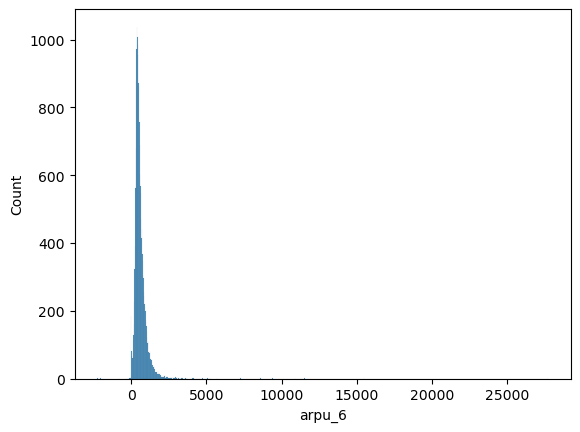

In [169]:
sns.histplot(x='arpu_6', data=churn)

<AxesSubplot: xlabel='arpu_7', ylabel='Count'>

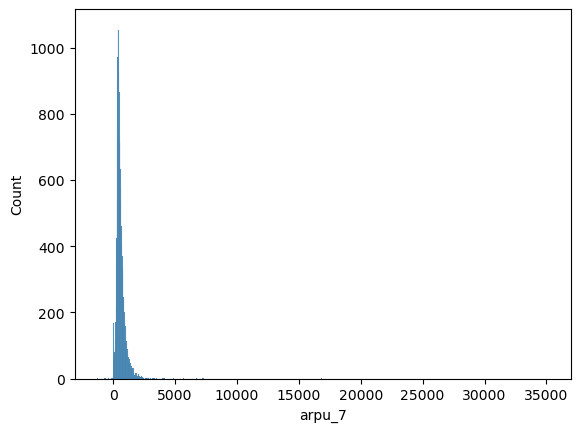

In [170]:
sns.histplot(x='arpu_7', data=churn)

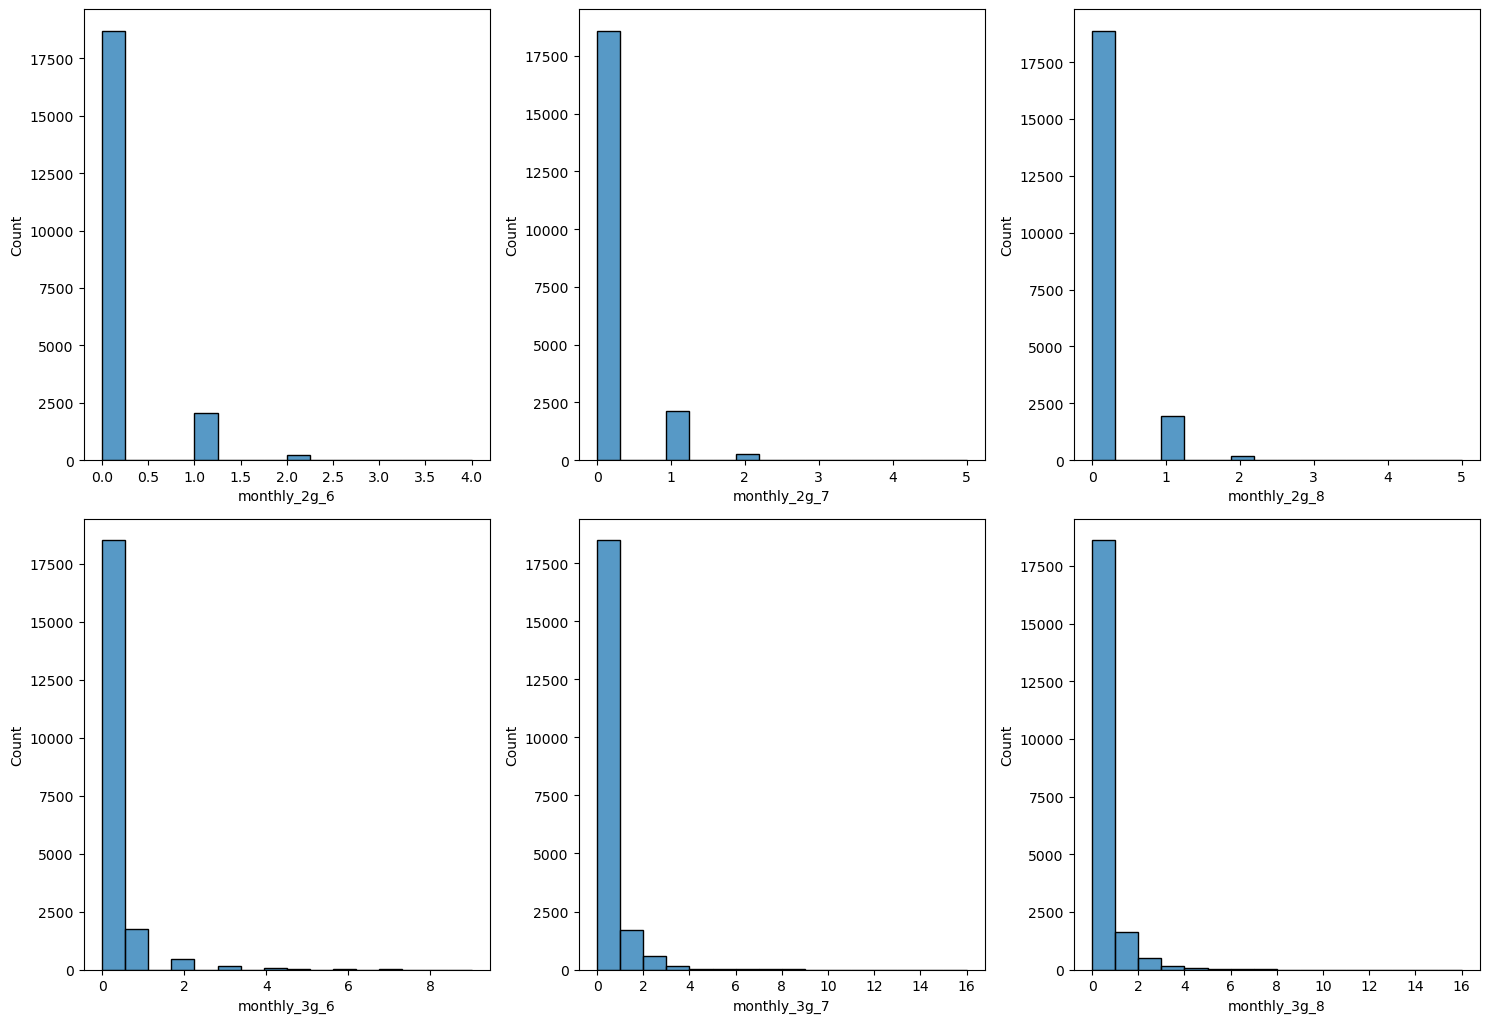

In [171]:
cols = 3
rows = 3
num_cols = [ 'monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8']

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = churn[col], ax = ax)
    
fig.tight_layout()  
plt.show()

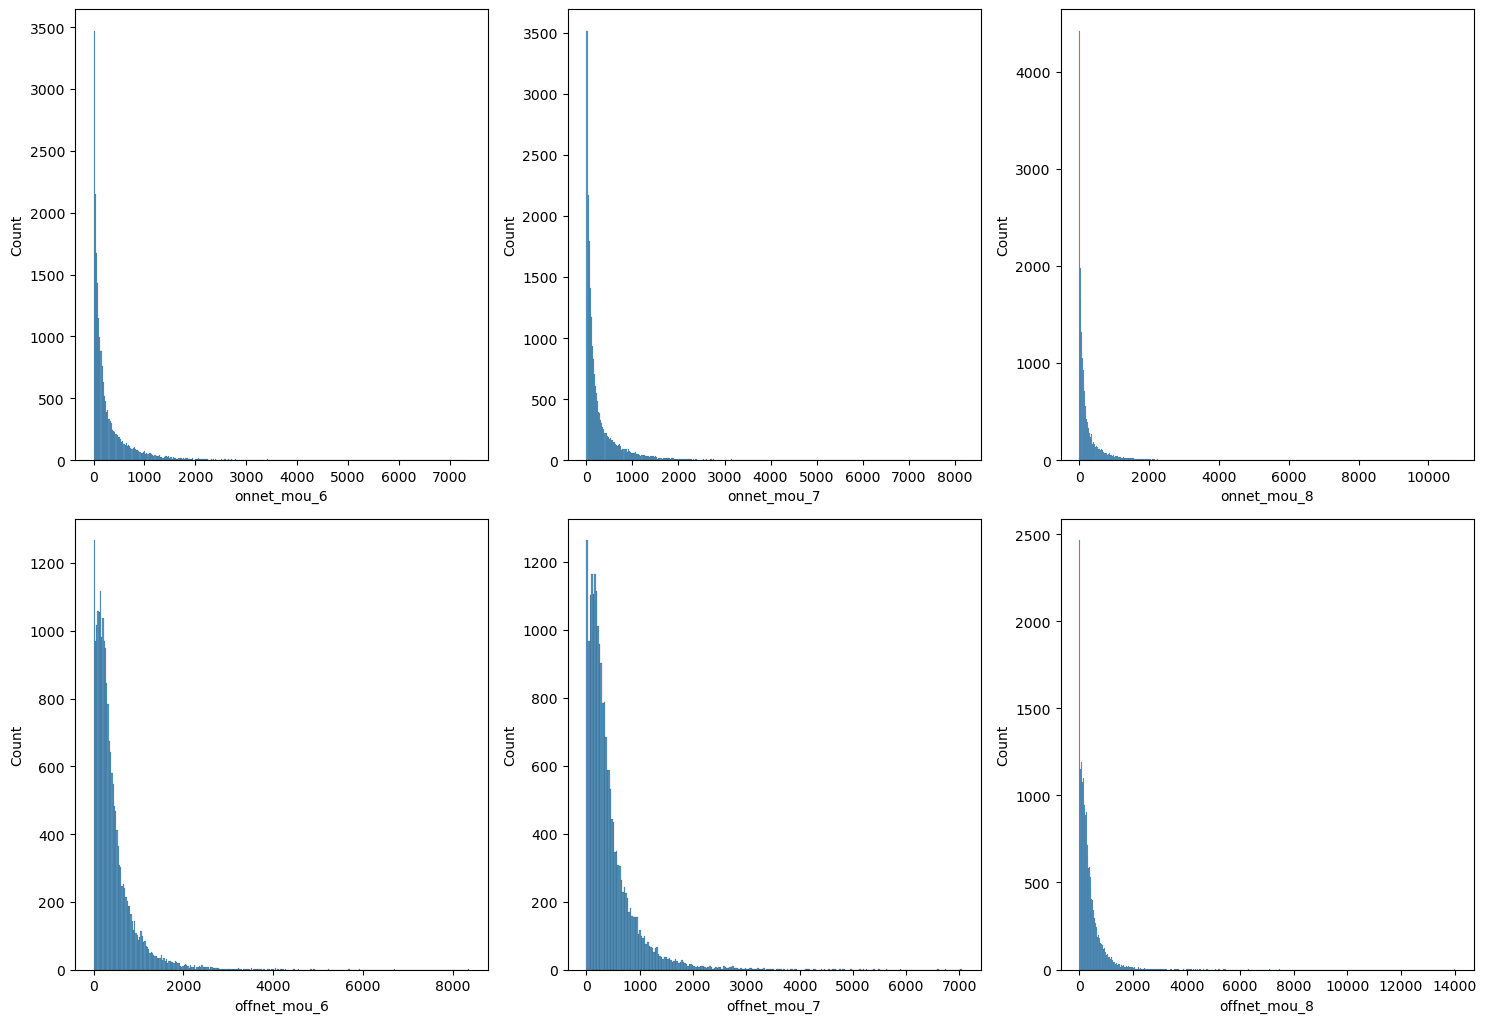

In [172]:
cols = 3
rows = 3
num_cols = ['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = churn[col], ax = ax)
    
fig.tight_layout()  
plt.show()

### Bi Variate 

In [173]:
# colnames_numerics_only = churn.select_dtypes(include=np.c).columns.tolist()
# colnames_numerics_only

In [174]:
# sns.barplot(x ='sachet_2g_6', y ='churn_probability', data = churn, palette ='plasma')

In [175]:
# sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['churn_probability'])

In [176]:
# sns.scatterplot(x=data['total_og_mou_7'],y=data['total_og_mou_8'],hue=data['churn_probability'])

In [177]:
# sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_7'],hue=data['churn_probability'])

### Data Preparation

In [178]:
# Derived variables to measure change in usage 

# Usage 
churn['delta_vol_2g'] = churn['vol_2g_mb_8'] - churn['vol_2g_mb_6'].add(churn['vol_2g_mb_7']).div(2)
churn['delta_vol_3g'] = churn['vol_3g_mb_8'] - churn['vol_3g_mb_6'].add(churn['vol_3g_mb_7']).div(2)
churn['delta_total_og_mou'] = churn['total_og_mou_8'] - churn['total_og_mou_6'].add(churn['total_og_mou_7']).div(2)
churn['delta_total_ic_mou'] = churn['total_ic_mou_8'] - churn['total_ic_mou_6'].add(churn['total_ic_mou_7']).div(2)
churn['delta_vbc_3g'] = churn['vbc_3g_8'] - churn['vbc_3g_6'].add(churn['vbc_3g_7']).div(2)

In [179]:
# # Revenue 
churn['delta_arpu'] = churn['arpu_8'] - churn['arpu_6'].add(churn['arpu_7']).div(2)
churn['delta_total_rech_amt'] = churn['total_rech_amt_8'] - churn['total_rech_amt_6'].add(churn['total_rech_amt_7']).div(2)

In [180]:
churn.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

#### Outlier treatment

In [181]:
# Looking at quantiles from 0.90 to 1. 
churn.quantile(np.arange(0.9,1.01,0.01), axis=0, numeric_only=True).style.bar()

,id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,churn_probability,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,63005.100000,798.749000,825.241000,724.516000,927.069000,936.654000,860.685000,32.996000,18.580000,18.083000,66.169000,41.246000,37.239000,205.590000,206.510000,195.840000,436.426000,433.799000,413.016000,18.396000,18.690000,16.860000,4.010000,4.710000,4.380000,655.966000,649.494000,623.402000,637.906000,669.860000,570.832000,624.491000,654.414000,542.319000,2.160000,2.110000,1.600000,1153.883000,1188.231000,1066.884000,0.000000,0.000000,0.000000,15.933000,19.296000,18.139000,2.280000,0.000000,0.000000,154.052000,154.880000,147.389000,366.680000,359.855000,357.419000,39.310000,41.180000,37.366000,556.975000,551.030000,543.820000,33.880000,35.233000,31.696000,73.202000,74.846000,67.930000,4.343000,4.553000,3.866000,114.848000,117.875000,106.716000,0.290000,0.000000,0.000000,14.810000,17.680000,15.303000,1.180000,1.580000,1.230000,23.000000,23.000000,21.000000,279.000000,279.000000,252.000000,250.000000,250.000000,225.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2844.000000,0.000000,1113.650000,29.128500,154.610000,346.729500,146.954500,70.620500,253.846100,316.150000
0.910000,63793.400000,854.350500,879.661600,785.119400,980.440800,984.972900,907.713500,39.733500,23.769400,22.449400,78.924100,50.483500,46.558800,222.541100,222.344600,213.043400,461.774100,456.834700,437.419900,20.219400,20.790000,18.724100,4.654700,5.400000,5.050000,697.687000,685.688100,659.813500,697.098000,728.173600,624.855800,672.874500,704.846800,595.331000,2.819400,2.730000,2.084700,1214.057000,1251.372900,1135.147500,0.000000,0.000000,0.000000,17.690000,21.104700,19.810000,2.580000,0.000000,0.000000,164.334700,165.730000,157.992900,389.128700,382.466400,378.290000,43.719400,45.644100,41.524100,591.474100,581.879300,575.557000,37.280000,38.834700,35.483500,79.219400,81.649400,74.490000,5.180000,5.540000,4.654700,124.774100,128.213500,115.939900,0.300000,0.000000,0.000000,17.980000,21.494700,18.969400,1.450000,1.930000,1.510000,24.000000,24.000000,22.000000,325.000000,325.000000,289.000000,250.000000,250.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2909.000000,0.000000,1151.500000,38.755800,217.699050,379.509650,160.974100,96.374700,275.752580,345.000000
0.920000,64468.640000,916.618000,940.243200,851.256000,1045.784800,1041.657200,954.854000,48.922800,30.080000,28.460000,95.811200,61.665600,57.265600,245.636800,242.736400,231.479200,490.4620

In [182]:
churn.quantile(np.arange(0.9,1.01,0.01), axis=0, numeric_only=True).pct_change().mul(100).style.bar()

,id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,churn_probability,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,1.251169,6.961073,6.594510,8.364674,5.757047,5.158671,5.464078,20.419142,27.930032,24.146436,19.276549,22.396111,25.026988,8.245099,7.667716,8.784416,5.808110,5.310224,5.908706,9.911937,11.235955,11.056346,16.077307,14.649682,15.296804,6.360238,5.572661,5.840774,9.279110,8.705341,9.464045,7.747670,7.706559,9.775059,30.527778,29.383886,30.293750,5.214913,5.313941,6.398399,nan,nan,nan,11.027427,9.373445,9.212195,13.157895,nan,nan,6.674824,7.005424,7.194499,6.122150,6.283475,5.839365,11.216993,10.840457,11.128031,6.194012,5.598479,5.835938,10.035419,10.222519,11.949457,8.220267,9.089865,9.657000,19.272392,21.678014,20.400931,8.642815,8.770732,8.643409,3.448276,nan,nan,21.404456,21.576357,23.958701,22.881356,22.151899,22.764228,4.347826,4.347826,4.761905,16.487455,16.487455,14.682540,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.285513,nan,3.398734,33.051135,40.805284,9.454099,9.540096,36.468448,8.629827,9.125415
0.920000,1.058479,7.288285,6.886921,8.423763,6.664757,5.754910,5.193324,23.127336,26.549261,26.773990,21.396633,22.150009,22.996297,10.378173,9.171259,8.653542,6.212540,5.912095,6.072266,11.706579,12.419432,11.247003,17.730466,13.385185,14.851485,5.873493,5.665535,6.242203,8.861537,8.920345,9.136220,8.760014,9.380989,10.137856,31.588281,32.102564,32.393150,5.572803,5.867947,6.951317,inf,inf,nan,9.892595,10.036153,10.412923,12.790698,nan,nan,8.749522,8.066614,9.042622,6.289976,5.893537,5.706521,12.199161,12.535026,12.880953,5.945873,6.084887,6.093263,11.905579,12.264547,12.249355,10.947571,10.140675,10.371325,21.745174,20.216606,22.027198,9.083536,9.478019,10.264025,10.000000,nan,inf,20.927697,20.448297,24.469936,24.137931,22.093264,23.178808,4.166667,4.166667,4.545455,7.692308,7.692308,14.186851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.268821,inf,3.821103,38.046950,27.683883,11.011670,9.217321,32.425004,9.307373,8.695652
0.930000,1.072180,8.540

In [183]:
# Columns with outliers 
pct_change_99_1 = churn.quantile(np.arange(0.9,1.01,0.01),axis=0, numeric_only=True).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [184]:
# capping outliers to 99th percentile values
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = churn[col].quantile(0.99)
    condition = churn[col] > outlier_threshold
#     outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : churn.loc[condition,col].shape[0] }, ignore_index=True)
    df = pd.DataFrame({'Column' : col,'Outlier Threshold': outlier_threshold,'Outliers replaced': churn.loc[condition,col].shape[0]}, index=[0])
    outlier_treatment = pd.concat([outlier_treatment, df])
    churn.loc[condition, col] = outlier_threshold
outlier_treatment

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2178.01000,211
0,onnet_mou_7,2252.44370,211
0,onnet_mou_8,2167.07550,211
0,offnet_mou_6,2334.83110,211
0,offnet_mou_7,2385.26690,211
0,offnet_mou_8,2187.93640,211
0,roam_ic_mou_6,336.36370,211
0,roam_ic_mou_7,296.93760,211
0,roam_ic_mou_8,285.60420,211
0,roam_og_mou_6,552.15320,211


In [185]:
categorical = churn.dtypes == 'category'
categorical_vars = churn.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'churn_probability'} #independent categorical variables
ind_categorical_vars

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

#### Grouping Categories with less Contribution

In [186]:
# function for numerical variable univariate analysis
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [187]:
# Finding & Grouping categories with less than 1% contribution in each column into "Others"
for col in ind_categorical_vars : 
    category_counts = 100*churn[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    churn[col].replace(low_count_categories,'Others',inplace=True)


 +----+---------------+
|    |   sachet_2g_8 |
|----+---------------|
|  0 |   79.7602     |
|  1 |    9.02084    |
|  2 |    3.18774    |
|  3 |    2.14102    |
|  4 |    1.86983    |
|  5 |    1.41783    |
|  6 |    0.87544    |
|  7 |    0.428204   |
|  8 |    0.32829    |
|  9 |    0.223618   |
| 10 |    0.157008   |
| 11 |    0.123703   |
| 12 |    0.10943    |
| 15 |    0.0570939  |
| 14 |    0.0523361  |
| 13 |    0.0475783  |
| 16 |    0.0428204  |
| 18 |    0.028547   |
| 17 |    0.0237891  |
| 19 |    0.0190313  |
| 20 |    0.0190313  |
| 22 |    0.00951565 |
| 24 |    0.00951565 |
| 27 |    0.00951565 |
| 29 |    0.00951565 |
| 21 |    0.00475783 |
| 23 |    0.00475783 |
| 31 |    0.00475783 |
| 32 |    0.00475783 |
| 34 |    0.00475783 |
| 44 |    0.00475783 |
| 25 |    0          |
+----+---------------+ 

Replaced [6, 7, 8, 9, 10, 11, 12, 15, 14, 13, 16, 18, 17, 19, 20, 22, 24, 27, 29, 21, 23, 31, 32, 34, 44, 25] in sachet_2g_8 with category : Others

 +----+------------

#### Creating Dummy Variables

In [188]:
my_list = list(ind_categorical_vars)
dummy_vars = pd.get_dummies(churn[my_list], drop_first=False, prefix=my_list, prefix_sep='_', dtype=int)
dummy_vars.head()

,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others
12,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
15,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
23,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
24,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
25,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [189]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['sachet_2g_8_Others',
 'sachet_3g_7_Others',
 'sachet_3g_6_Others',
 'sachet_2g_7_Others',
 'sachet_2g_6_Others',
 'sachet_3g_8_Others']

In [190]:
ind_categorical_vars

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

In [191]:
# concatenating dummy variables with original 'data'
churn.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
churn = pd.concat([churn, dummy_vars], axis=1)
churn.head()

,id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,churn_probability,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_8_0,sachet_3g_8_1
12,12,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,110,110,50,110,0,0,0,0,0.0,0,0,0,322,0,469.5,0.00,0.0,-138.925,-7.925,0.0,-26.9085,-104.5,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
15,15,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,250,250,250,0,150,250,1,0,1.0,0,0,0,602,0,527.0,224.14,0.0,44.315,124.655,0.0,-140.6355,125.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
23,23,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,110,110,144,110,50,30,0,0,0.0,0,0,0,455,0,1205.0,0.00,0.0,-600.100,-320.160,0.0,-538.4650,-711.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
24,24,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252.48,257.74,129.73,0.00,0.00,0.00,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,52.49,37.84,19.14,170.61,106.

In [192]:
dummy_cols = dummy_vars.columns.to_list()
churn[dummy_cols] = churn[dummy_cols].astype('category')

In [193]:
churn.shape

(21018, 132)

In [194]:
churn.isnull().sum()

id                      0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_mou_8        0
std_og_mou_6            0
std_og_mou_7

This following section contains

Test Train Split
Class Imbalance
Standardization
Modelling
Model 1 : Logistic Regression with RFE & Manual Elimination ( Interpretable Model )
Model 2 : PCA + Logistic Regression
Model 3 : PCA + Random Forest Classifier
Model 4 : PCA + XGBoost

##### Train-Test Split

In [195]:
y = churn.pop('churn_probability') # Predicted / Target Variable
X = churn # Predictor variables

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

#### Class Imbalance

In [197]:
y.value_counts(normalize=True).to_frame()

,churn_probability
0,0.911552
1,0.088448


In [198]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.097


#### USING SMOTE

In [199]:
!pip3 install scikit-learn==1.2.2

In [200]:
import sklearn
print(sklearn.__version__)

1.0.2


In [201]:
print("TESTING....")

TESTING....


In [206]:
!python -V

Python 3.9.13


In [202]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.shape

ImportError: cannot import name '_is_arraylike_not_scalar' from 'sklearn.utils.validation' (C:\Users\sivaskandan\anaconda3\lib\site-packages\sklearn\utils\validation.py)

In [ ]:
X_train_resampled = X_train_resampled.fillna(0)

In [ ]:
# X_train_resampled['monthly_2g_8_0'].fillna(0)

In [ ]:
X_train_resampled.isna().sum()

In [ ]:
# # Assuming 'variable' is the variable you want to check
# is_dataframe = isinstance(X_imputed, pd.DataFrame)

# if is_dataframe:
#     print("The variable is a pandas DataFrame.")
# else:
#     print("The variable is not a pandas DataFrame.")


In [ ]:
print("TESTING ENDS....")

### Modelling

### Model 1 :  Logistic Regression

#### Baseline Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [ ]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

#### Baseline Performance

In [ ]:
# Function for Baseline Performance Metrics
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [ ]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [ ]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

In [ ]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

##### Baseline Performance - Finding Optimum Probability Cutoff

In [ ]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

In [ ]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    df = pd.DataFrame({'sensitivity' :sensitivity,'specificity' : specificity,'accuracy' : accuracy}, index=[0])
    metrics_df = pd.concat([metrics_df, df])
    
metrics_df.index = thresholds
metrics_df

In [ ]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

#### Baseline Performance at Optimum Cutoff

In [ ]:
optimum_cutoff = 0.50
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

In [ ]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

In [ ]:
# ROC_AUC score 
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

#### Feature Selection using RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results.support_

In [ ]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

In [ ]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

##### Logistic Regression with RFE Selected Columns

In [ ]:
# Logistic Regression Model with RFE columns
import statsmodels.api as sm 

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
const = sm.add_constant(X_train_resampled[rfe_selected_columns])
const

logr = sm.GLM(y_train_resampled, const, family = sm.families.Binomial(), missing='drop')
logr_fit = logr.fit()
logr_fit.summary()

#### Logistic Regression with Manual Feature Elimination

In [ ]:
#Using P-value and vif for manual feature elimination


from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]

    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

##### 'monthly_2g_7_0' has the very p-value. Hence, this feature could be eliminated

In [ ]:
selected_columns = rfe_selected_columns
selected_columns.remove('monthly_2g_7_0')
selected_columns

#### Model II

In [ ]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

In [ ]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

###### 'monthly_2g_6_0' has very high p-value. Hence, this feature could be eliminated

In [ ]:
selected_columns.remove('monthly_2g_6_0')
selected_columns

#### Model III

In [ ]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

In [ ]:
# vif and p-values
vif(X_train_resampled, logr3_fit, selected_columns)

##### Model 4 

In [ ]:
selected_columns.remove('monthly_3g_8_0')
selected_columns

In [ ]:
logr4 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr4_fit = logr4.fit()
logr4_fit.summary()

In [ ]:
# vif and p-values
vif(X_train_resampled, logr4_fit, selected_columns)

#### Model 5

In [ ]:
selected_columns.remove('monthly_2g_8_0')
selected_columns

In [ ]:
logr5 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr5_fit = logr5.fit()
logr5_fit.summary()

In [ ]:
# vif and p-values
vif(X_train_resampled, logr4_fit, selected_columns)

#### model 6 

In [ ]:
selected_columns.remove('sachet_3g_6_0')
selected_columns

In [ ]:
logr6 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr6_fit = logr6.fit()
logr6_fit.summary()

In [ ]:
# vif and p-values
vif(X_train_resampled, logr6_fit, selected_columns)

#### Final Logistic Regression Model with RFE and Manual Elimination¶

In [ ]:
logr6_fit.summary()

In [ ]:
selected_columns

In [ ]:
y_train_pred_lr = logr6_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))

In [ ]:
y_train_pred_lr.head()

In [ ]:
y_test_pred_lr = logr6_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

##### Performance
##### Finding Optimum Probability Cutoff

In [ ]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

In [ ]:
# DataFrame for Performance metrics at each threshold

logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
#     logr_metrics_df =  logr_metrics_df.append({ 
#         'sensitivity' :sensitivity,
#         'specificity' : specificity,
#         'accuracy' : accuracy
#     }, ignore_index = True)
    df = pd.DataFrame({'sensitivity' : sensitivity,'specificity': specificity,'accuracy': accuracy}, index=[0])
    logr_metrics_df = pd.concat([logr_metrics_df, df])
    
logr_metrics_df.index = thresholds
logr_metrics_df

In [ ]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [ ]:
optimum_cutoff = 0.55
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

In [ ]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

In [ ]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

## Model 1 : Logistic Regression (Interpretable Model Summary)¶

In [ ]:
!pip3 install lxml

In [ ]:
lr_summary_html = logr3_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

### PCA

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

In [ ]:
pca.explained_variance_ratio_

##### Scree Plot

In [ ]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1,len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

In [ ]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

In [ ]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "churn_probability", size=8)

### Model 2 : PCA + Logistic Regression Model

In [ ]:
y_train_pca = data_train_pca.pop('churn_probability')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca )

In [ ]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

In [ ]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

#### Baseline Performance

In [ ]:
rain_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

#### Hyperparameter Tuning

In [ ]:
# Creating a Logistic regression model using pca transformed train set
from sklearn.pipeline import Pipeline
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

In [ ]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

In [ ]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

In [ ]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

In [ ]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

## Model 3 : PCA + Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

In [ ]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

In [ ]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)


In [ ]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

In [ ]:

# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

In [ ]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

In [ ]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

In [ ]:
## out of bag error 
pca_rf_best_fit.oob_score_


#### Model 4 : PCA + XGBoost

In [ ]:
import xgboost as xgb
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                  
                                  
                                  )  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

In [ ]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

In [ ]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

In [ ]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200,500]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

In [ ]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

In [ ]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)
y_train_pred_pca_xgb_best[:5]

In [ ]:
X_train_pca.head()

In [ ]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

In [ ]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

In [ ]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

### Recommendations

In [ ]:
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']